


1) Aquisição dedados:

	a) Os dados deverão ser extraídos de pelo menos duas fontes de dados existentes em https://basedosdados.org/dataset. Outras fontes de dados serão aceitas, desde que haja a descrição do repositório de dados públicos de onde elas foram olhidas;

	b) Os dois datasets devem apresentar características que permitam a sua integração, ou seja, que possam ser manipulados de forma a se tornar um só datset maior;

	c) Após a integração dos dois datasets originais, o dataset resultante deverá possuir pelo menos 0 registros;

	c) Descrever os datasets escolhidos e o forto utilizado.



2) Preparação ds dados coletados:

	Devem ser descritas as ações que seão necessárias para:

	a) A integração d tais fontes de dados;

	b) Limpeza, normalizações, reescalonamentos, padronizações e demais ações necessár à adequação dos dados;



3) Análise dos dados:

	a) Descrever o tipo de cada dado coletado, classificando-o como categórico ou numérico e escolhendo o melhor subtipo (nominal, ordinal, discreto, contínuo, etc) e as ações tomadas para dequá-lo ao formato escolhido;

	b) Calcular e descrever os parâmetros estatísticos básicos dos dados já tratados, informando sua média, desvio padrão, coeficiente de variação, mediana, moda e os limites dos quartis de pelo menos uma varivel numérica contida no dataset;

	c) Baseado nos z-scores -3 e +3, destacar quantos registros podem ser considerados outliers, informando qual variável foi utilizada para tal mensuração e qual tratamento deverá ser dado ao registro como um todo, ou seja, se o registro será descartado, receberá alguma forma de tratamento ou se será pcessado paralelamente aos demais;



4) Exibir as variáveis considerdas mais relevantes dentro do dataset:

	a) Utilizando, no total, pelo menos três tipos de gráficos distintos. Podem ser utilizadas variáeis distintas para cada tipo de gráfico;

	b) Tecendo considerações sobre o porquê do gráfico escolhido ser o mais adequadpara a exibição das variáveis escolhis.



5) Discutir os resultado inferidos.



6) Descrever as ferramentastilizadas para a manipulação e análise dos dados.



7) Utilizar técnicas de aprendizagem de máquina nos dados coletados, como clusterização, classificação, regssão, ou qualquer outra técnica preditiva (opcional).



Poderão ser utilizadas para o tratamento e exibição dos dados quaisquer ferramentas que esteja ao alcance do aluno, podendo ser planilhas de cálculo, linguagens de programação ou ferramentas on-line, incluindo-se ai, ferramentas de IA, desde que desctas suas características e a forma com que foi utilizada.



O trabalho deveer realizado em grupos com, no máximo, 5 (cinco) integrantes.



Entregáveis:
	- O trabalho será entregue sob a forma de apresentação gravada em vídeo, publicado no Youtube, com duração de até 8 minutos, abordando todos os aspectos descritos acima. A voz e imagem de pelo menos um integrante do grupo devem estar presentes no vídeo.

	- Deve ser submetido um arquivo PDF contendo o conteúdo da apresentação utilizada no vídeo e o link do vídeo publicado.

	- Deve ser disponibilizado um link por onde possam ser visualizados os arquivos contendo os datasets originais e integrado (obrigatório) e o código utilizado para a análise (se for o caso). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

#from warnings import simplefilter
#simplefilter(action='ignore', category='FutureWarning')


In [2]:
#Lendo arquivos csv
df1 = pd.read_csv('Dados/Customer-Churn-Records1.csv', delimiter=";")
df2 = pd.read_csv('Dados/Customer-Churn-Records2.csv', delimiter=";")
df3 = pd.read_csv('Dados/Customer-Churn-Records3.csv', delimiter=";")

In [3]:
#Juntando os arquivos
df = pd.concat([df1, df2, df3], axis=0)

#Observando o dataframe criado
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647311,Hill,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
1,15737888,Mitchell,850,Spain,Female,43,2,12551082,1,1,1,790841,0
2,15574012,Chu,645,Spain,Male,44,8,11375578,2,1,0,14975671,1
3,15656148,Obinna,376,Germany,Female,29,4,11504674,4,1,0,11934688,1
4,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,7639001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,15783019,Price,794,France,Female,62,9,12368132,3,1,0,17358663,1
3740,15728912,Swanson,554,France,Female,44,6,9243686,1,1,0,1260339,0
3741,15583480,Morgan,807,France,Female,36,4,0,2,0,1,14700733,0
3742,15613886,Trevisan,722,Spain,Male,43,1,0,1,1,0,4456017,1


In [4]:
#Observando os valores 
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.123600e+04,11236.000000,11236.000000,11236.000000,1.123600e+04,11236.000000,11236.000000,11236.000000,1.123600e+04,11236.000000
mean,1.569070e+07,650.652634,39.010858,5.005518,6.923239e+06,1.523852,0.706924,0.510947,9.124041e+06,0.205322
std,7.150590e+04,97.486451,10.626937,2.876600,6.292396e+06,0.579782,0.455193,0.499902,6.134685e+06,0.403955
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.158000e+03,0.000000
25%,1.562830e+07,583.000000,32.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,3.373827e+06,0.000000
50%,1.569023e+07,652.000000,37.000000,5.000000,8.476479e+06,1.000000,1.000000,1.000000,8.932767e+06,0.000000
75%,1.575251e+07,718.000000,44.000000,8.000000,1.243688e+07,2.000000,1.000000,1.000000,1.439616e+07,0.000000
max,1.581566e+07,850.000000,88.000000,10.000000,2.508981e+07,4.000000,1.000000,1.000000,1.999707e+07,1.000000


In [5]:
#Excluindo colunas desnecessárias
df = df.drop("CustomerId", axis = 1)

In [6]:
#Observando os dados de uma das linhas com o maior salário
df[df['EstimatedSalary'] == df['EstimatedSalary'].max()].head(1)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1788,Dyer,639,Germany,Female,41,5,9863577,1,1,0,19997074,0


In [7]:
#Observando os dados de uma das linhas com o menor salário
df[df['EstimatedSalary'] == df['EstimatedSalary'].min()].head(1)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1223,Lucciano,709,Germany,Male,45,4,12291771,1,1,1,1158,1


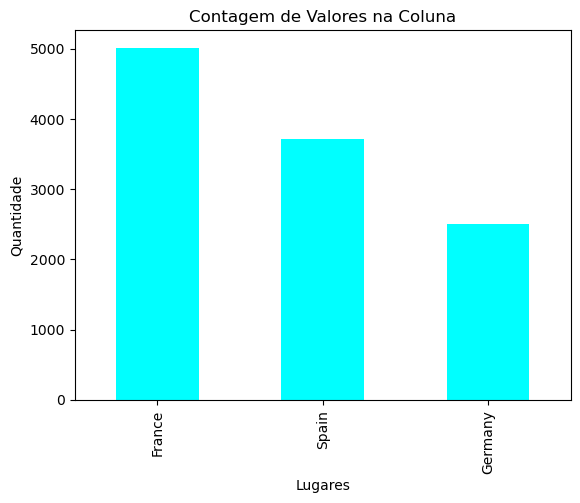

In [8]:
# Criando um gráfico de barras para observar as proporções entre os lugares
df['Geography'].value_counts().plot(kind='bar', color='cyan')

# Adicionando título e rótulos aos eixos
plt.title('Contagem de Valores na Coluna')
plt.xlabel('Lugares')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()



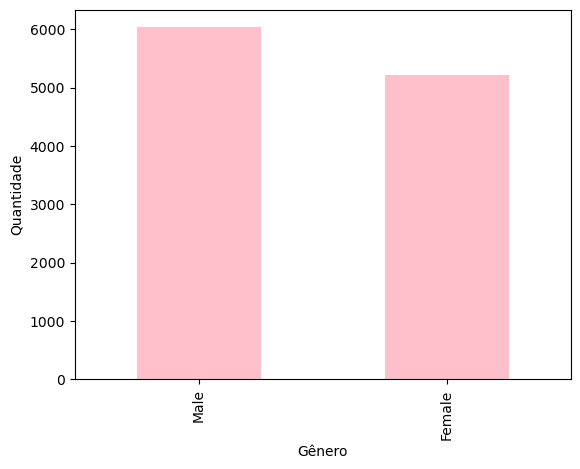

In [9]:
#Criando um gráfico de barras para observar a proporção entre homens e mulheres
df['Gender'].value_counts().plot(kind='bar', color='pink')

plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

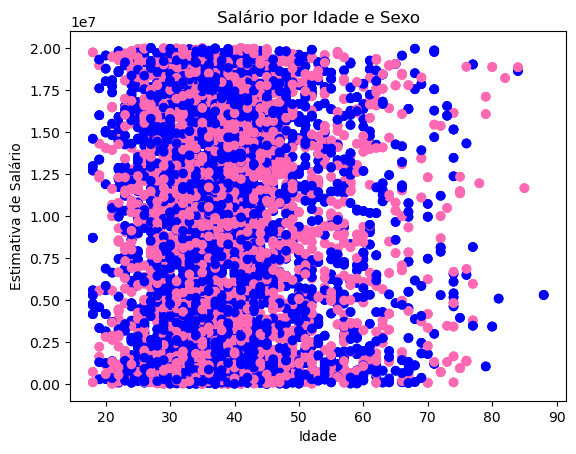

In [10]:
#Criando um gráfico do tipo "Scatter" para observar a proporção entre idade e salários de homens e mulheres

x = df['Age']
y = df['EstimatedSalary']
categorias = df['Gender']

cores = ['blue' if cat=='Male' else 'hotpink' for cat in categorias]
plt.title('Salário por Idade e Sexo')
plt.xlabel('Idade')
plt.ylabel('Estimativa de Salário')
plt.scatter(x, y, color=cores)

plt.show()
#sns.scatterplot(df, x=df['Age'], y=df['EstimatedSalary'], hue='Geography', style='Geography')

In [11]:
#df_count = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
#sns.heatmap(df_count.corr(), annot=True, cmap='Reds')


In [12]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hill,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
1,Mitchell,850,Spain,Female,43,2,12551082,1,1,1,790841,0
2,Chu,645,Spain,Male,44,8,11375578,2,1,0,14975671,1
3,Obinna,376,Germany,Female,29,4,11504674,4,1,0,11934688,1
4,Andrews,497,Spain,Male,24,3,0,2,1,0,7639001,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3739,Price,794,France,Female,62,9,12368132,3,1,0,17358663,1
3740,Swanson,554,France,Female,44,6,9243686,1,1,0,1260339,0
3741,Morgan,807,France,Female,36,4,0,2,0,1,14700733,0
3742,Trevisan,722,Spain,Male,43,1,0,1,1,0,4456017,1


In [13]:
#Substitui valores categóricos para valores numéricos, para fazer que o modelo também leve os leve em conta.
#Isso pode ser feito através do TensorFlow, mas fiz à mão para ficar um pouco mais claro
df['Gender'].replace(['Female', 'Male'], [1, 2], inplace=True) #Substitui 'Female' por 1 e 'Male' por 2
df['Geography'].replace(['France', 'Spain', 'Germany'], [1, 2, 3], inplace=True) #Substitui 'France' por 1, 'Spain' por 2 e 'Germany' por 3
#df['Card Type'].replace(['DIAMOND', 'PLATINUM', 'GOLD', 'SILVER'], [1, 2, 3, 4], inplace=True)

#Dropando colunas que não acrescentam nada, tipo nome e ID
df = df.drop(columns=['Surname'])


In [14]:
len(df.columns)

11

### Obs:
São necessárias 4 variáveis no modelo. 2 de treino e 2 de teste:
Isso acontece porque elas são mapeadas em um plano cartesiano, sendo de treino ou teste;
Daí um ponto para treino no plano cartesiano tem uma posição em X e outra em y e outro ponto, para teste, tem uma posição em X e outra posição em y. Formando os 4 pontos necessários:

X_train, y_train, X_test, y_test

In [15]:
#Definindo X e y
X = df.drop(columns=['Exited'])
y = df['Exited']

#Aplicando One-Hot Encoding
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [16]:
#Dividindo os dados em conjuntos de treino e teste.
#"train_test_split (X, y, test_size=0.3)" serve para dividir o dataframe em grupos de treino e teste utilizando um valor entre 0 e 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Normalizando os dados
scaler = StandardScaler()

# Converter X_train e X_test para arrays numpy
X_train = X_train.values
X_test = X_test.values

#Aplicando o scaler nos conjuntos de treino e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
#Escolhe um mondelo, no caso, random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

#Treina o modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
#Faz previsões com os dados de teste
y_pred = model.predict(X_test)

#Avalia a performance:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*10:.2f}%')

#Exibe um relatório de classificação
print(classification_report(y_test, y_pred))

Accuracy: 9.69%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2686
           1       0.95      0.89      0.92       685

    accuracy                           0.97      3371
   macro avg       0.96      0.94      0.95      3371
weighted avg       0.97      0.97      0.97      3371



In [20]:
#Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)


In [21]:
#Melhorando a performance
from sklearn.model_selection import GridSearchCV

#Define o grid de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [22]:
#Configura a busca
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [23]:
#Executa a busca
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [24]:
#Melhor combinação de hiperparâmetros
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [25]:
#Avalia o modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accucracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))

Accucracy: 96.89%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2686
           1       0.96      0.88      0.92       685

    accuracy                           0.97      3371
   macro avg       0.97      0.94      0.95      3371
weighted avg       0.97      0.97      0.97      3371



11

In [57]:
#Testando em uma nova amostra, de fora do banco de dados inicial
new_sample = np.array([[720, 1, 1, 35, 7, 9500000, 3, 1, 0, 8500000, 0]]) # Exemplo de uma nova amostra, cada valor corresponde respectivamente a cada coluna

#Normalização da amostra
new_sample_normalized = scaler.transform(new_sample)

#Previsão
predicted_class = model.predict(new_sample_normalized)
predicted_probabilities = model.predict_proba(new_sample_normalized)

#Resultado
#print(f'Predicted class: {y.[predicted_class[0]]}')
print(f'Previsão de Probabilidade (Churn, Não Churn): {predicted_probabilities}')


Previsão de Probabilidade (Churn, Não Churn): [[0.39 0.61]]


## Sistematização

O seguinte modelo foi desenvolvido com o intuito de faze a previsão de churn com base nos dados já existentens de clientes.

Todo o projeto foi desenvolvido seguindo algumas etapas predeterminadas como:
1. **Aquisição de dados:** De duas fontes, com datasets de mesmo tamanho e suas descrições;
2. **Preparação dos dados coletados:** Integração das fontes, limpeza, normalização, reescalonamento, padronização;
3. **Análise dos dados:** Tipo de cada dado, categórico ou numérico, estatísticas dos dadosm, destacar outliers;
4. **Variáveis mais relevantes:** Sexo, gênero, salário, score bancário;digo utilizado para a análise (se for o caso). 


Aquisição de Dados:

a) Os dados deverão ser extraídos de pelo menos duas fontes de dados existentes em https://basedosdados.org/dataset. Outras fontes de dados serão aceitas, desde que haja a descrição do repositório de dados públicos de onde elas foram olhidas;
b) Os dois datasets devem apresentar características que permitam a sua integração, ou seja, que possam ser manipulados de forma a se tornar um só datset maior;
c) Após a integração dos dois datasets originais, o dataset resultante deverá possuir pelo menos 0 registros;
d) Descrever os datasets escolhidos e o forto utilizado.

Preparação ds dados coletados:

Devem ser descritas as ações que seão necessárias para:

a) A integração d tais fontes de dados;

b) Limpeza, normalizações, reescalonamentos, padronizações e demais ações necessár à adequação dos dados;

Análise dos dados:

a) Descrever o tipo de cada dado coletado, classificando-o como categórico ou numérico e escolhendo o melhor subtipo (nominal, ordinal, discreto, contínuo, etc) e as ações tomadas para dequá-lo ao formato escolhido;

b) Calcular e descrever os parâmetros estatísticos básicos dos dados já tratados, informando sua média, desvio padrão, coeficiente de variação, mediana, moda e os limites dos quartis de pelo menos uma varivel numérica contida no dataset;

c) Baseado nos z-scores -3 e +3, destacar quantos registros podem ser considerados outliers, informando qual variável foi utilizada para tal mensuração e qual tratamento deverá ser dado ao registro como um todo, ou seja, se o registro será descartado, receberá alguma forma de tratamento ou se será pcessado paralelamente aos demais;

Exibir as variáveis considerdas mais relevantes dentro do dataset:

a) Utilizando, no total, pelo menos três tipos de gráficos distintos. Podem ser utilizadas variáeis distintas para cada tipo de gráfico;

b) Tecendo considerações sobre o porquê do gráfico escolhido ser o mais adequadpara a exibição das variáveis escolhis.

Discutir os resultado inferidos.

Descrever as ferramentastilizadas para a manipulação e análise dos dados.
 oderão ser utilizadas para o tratamento e exibição dos dados quaisquer ferramentas que esteja ao alcance do aluno, podendo ser planilhas de cálculo, linguagens de programação ou ferramentas on-line, incluindo-se ai, ferramentas de IA, desde que desctas suas características e a forma com que foi utilizada.

O trabalho deveer realizado em grupos com, no máximo, 5 (cinco) integrantes.

Entregáveis: - O trabalho será entregue sob a forma de apresentação gravada em vídeo, publicado no Youtube, com duração de até 8 minutos, abordando todos os aspectos descritos acima. A voz e imagem de pelo menos um integrante do grupo devem estar presentes no vídeo.

- Deve ser submetido um arquivo PDF contendo o conteúdo da apresentação utilizada no vídeo e o link do vídeo publicado.

- Deve ser disponibilizado um link por onde possam ser visualizados os arquivos contendo os datasets originais e integrado (obrigatório) e o código utilizado para a análise (se for o caso). 
